In [115]:
# %pip install groq


In [170]:
def getData():
    users = []
    try:
        with open("users.txt", "r") as f:
            for line_num, line in enumerate(f, start=1):
                words = line.strip().split("$")
                if len(words) == 3:
                    username, password, attr = words
                    users.append((username, password, attr))
    except FileNotFoundError:
        # Create an empty file
        with open("users.txt", "w") as f:
            pass  # Just creates the file

    return users

def getuserprogressdata():
    userTrackedData = []
    try:
        with open("tracker.txt", "r") as f:
            for line_num, line in enumerate(f, start=1):
                words = line.strip().split("$")
                if len(words) == 3:
                    username, height, weight = words
                    userTrackedData.append((username, height, weight))
    except FileNotFoundError:
        # Create an empty file
        with open("tracker.txt", "w") as f:
            pass  # Just creates the file

    return userTrackedData



users = getData()
trackerData = getuserprogressdata()
usernamesOnly = {u for u, _, _ in users}
user = input("Username : ")
password = input("Password : ")


if user not in usernamesOnly:
    print("Creating new user")
    print("Please provide us with some essential data in the format --> age, gender, height, weight, foodPreferences , restrictions(eg veg/nonVeg/vegan) and allergies(important) ")
    attr = input("--> ")
    with open("users.txt", "a+") as f:
        f.write(f"{user}${password}${attr}\n")


users = getData()
trackerData = getuserprogressdata()



matched_user = next((u for u in users if u[0] == user and u[1] == password), None)
if matched_user:
    print("✅ Login Successful")
    print("Complete Daily Progress Tracker Log !")
    height = input("Height (in metres) : ")
    weight = input("Weight (in kg) : ")
    with open("tracker.txt", "a") as f:
        f.write(f"{user}${height}${weight}\n")
else:
    print("❌ Wrong password")


users = getData()
trackerData = getuserprogressdata()

Username : ath
Password : pass
✅ Login Successful
Complete Daily Progress Tracker Log !
Height (in metres) : 1.3
Weight (in kg) : 150


In [171]:
def get_latest_tracker_data(trackerData, target_username):
    for entry in reversed(trackerData):
        if entry[0] == target_username:
            height = entry[1].strip()
            weight = entry[2].strip()
            return height, weight
    return None, None

In [172]:
def meal_planning():
    client = Groq(
      api_key=("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"),
    )
    matched_user_tuple = next((u for u in users if u[0] == user), None)
    msg = input("Enter any on the spot instructions or messages, you can enter your goals also, for generating the meal plan (use simple english) : ")
    prompt = f" gen a good healthy and economical meal plan for me given the details are --> permanent preferences taken at user login  INITIAL DATA --- {matched_user_tuple[2]}, --> latest data --> {get_latest_tracker_data(trackerData, user)}in metres and kg --> instructions / message from user > {msg} <  ---------- this is a prompt only, dont include this the report, gen a professional and effective plan on this in a structured manner, use the latest data only, INITIAL DATA is only there to show the person's growth rate in the past, gen with timed meals"
    chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="llama-3.3-70b-versatile",
    )
    return chat_completion.choices[0].message.content



In [173]:
def get_user_tracker_records(trackerData, target_username):
    heights = []
    weights = []

    for entry in trackerData:
        if entry[0] == target_username:
            try:
                h = float(entry[1])
                w = float(entry[2])
                heights.append(h)
                weights.append(w)
            except ValueError:
                pass  # Skip invalid numeric data
    return heights, weights

In [174]:
def display_progress():
      heights, weights = get_user_tracker_records(trackerData, user)

      if not heights or not weights:
          print("No valid progress data found.")
          return

      plt.figure(figsize=(8, 4))
      plt.plot(range(1, len(weights)+1), weights, marker='o', label='Weight (kg)')
      plt.title(f"📈 Weight Progress for {user}")
      plt.xlabel("Log Entry #")
      plt.ylabel("Weight (kg)")
      plt.grid(True)
      plt.legend()
      plt.tight_layout()
      plt.show()


🟢 Welcome to the Diet Planner / Weight Tracker App
1️⃣  Meal Planning
2️⃣  Display BMI
3️⃣  Display Progress
4️⃣  Exit
Enter your choice (1-4): 3


/tmp/ipython-input-174-880675714.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


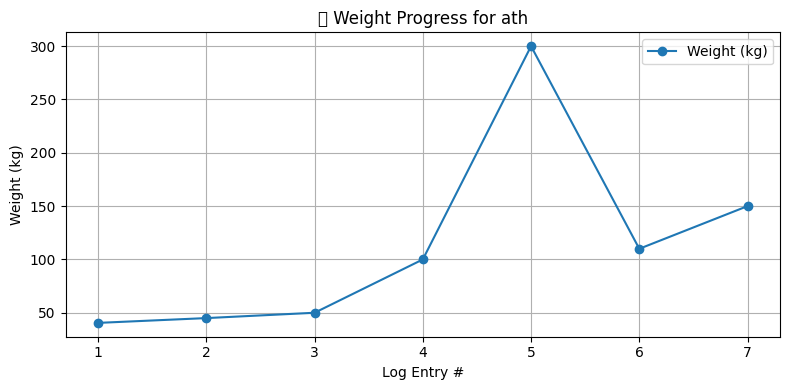

In [ ]:
import os
from groq import Groq
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

client = Groq(
    api_key=("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"),
)
def main_menu():
    while True:
        clear_output(wait=True)
        print("\n🟢 Welcome to the Diet Planner / Weight Tracker App")
        print("1️⃣  Meal Planning")
        print("2️⃣  Display BMI")
        print("3️⃣  Display Progress")
        print("4️⃣  Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == "1":
            print("⏳ Generating meal plan...")
            result = meal_planning()
            print(result, flush=True)
            time.sleep(0.3)
        elif choice == "2":
            data = get_latest_tracker_data(trackerData, user)
            height = float(data[0])
            weight = float(data[1])
            bmi = weight / (height ** 2)
            print(f"Your BMI is: {bmi:.2f}")
        elif choice == "3":
            display_progress()
        elif choice == "4":
            print("👋 Exiting. Stay healthy!")
            break
        else:
            print("❌ Invalid choice. Please try again.")

        time.sleep(0.2)
        input("\nPress Enter to return to the main menu...")


main_menu()